In [1]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import math
%matplotlib inline

In [2]:
#loading data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
#creating validation data and scaling data to range 0-1
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

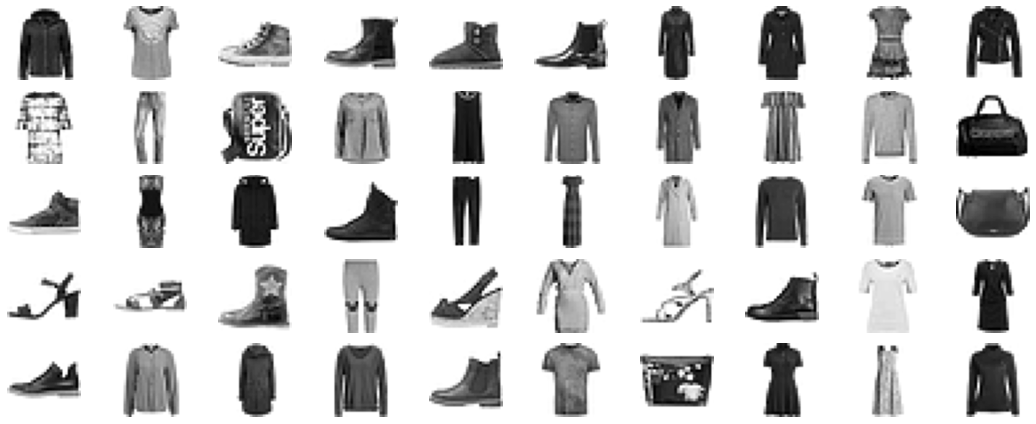

In [6]:
plt.figure(figsize=(15, 6))
n_rows = 5
n_cols = 10

for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [7]:
y_train[:50]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4, 0, 1, 8, 6, 3, 6, 4, 3, 2, 8, 7, 3,
       4, 7, 1, 3, 4, 2, 0, 8, 5, 5, 9, 1, 5, 3, 5, 9, 0, 3, 9, 6, 4, 2,
       9, 0, 8, 3, 3, 2], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

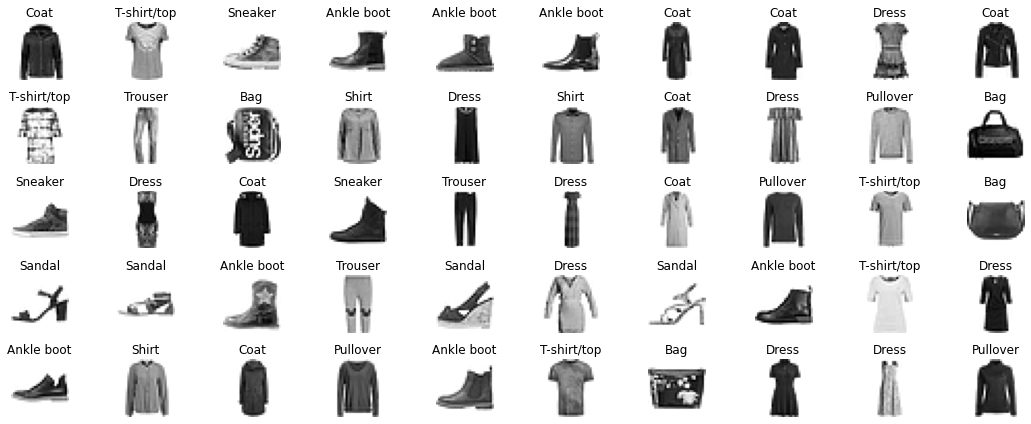

In [10]:
plt.figure(figsize=(15, 6))
n_rows = 5
n_cols = 10

for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_train[i]], fontdict={'fontsize': 12, 'color': 'black'})
    
plt.tight_layout()
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(600,activation = 'relu'),
     keras.layers.Dense(100,activation = 'relu'),
     keras.layers.Dense(10,activation = 'sigmoid')]
)

# loss = for  multiclass classificattion = 'sparse_categoorical_crossentropy'
# loss = for binary classification = 'categorical_crossentropy'

# compile your model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5)
model.evaluate(X_test,y_test)

Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4821 - accuracy: 0.8254
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3610 - accuracy: 0.8682
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3280 - accuracy: 0.8781
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3020 - accuracy: 0.8871
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8672


[0.35029932856559753, 0.8672000169754028]

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 600)               471000    
                                                                 
 dense_22 (Dense)            (None, 100)               60100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 532,110
Trainable params: 532,110
Non-trainable params: 0
_________________________________________________________________


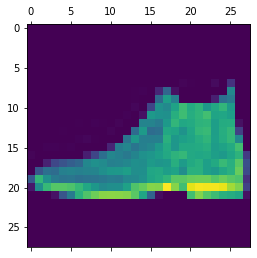

In [16]:
plt.matshow(X_test[0])

In [17]:
y_test[0]

9

In [18]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [19]:
y_predict = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [20]:
y_predict[4]

array([9.6308970e-01, 2.8053281e-04, 7.5822043e-01, 1.5010437e-01,
       3.2890323e-01, 6.9279093e-05, 9.9772185e-01, 4.7352269e-06,
       1.9369084e-02, 1.8675028e-05], dtype=float32)

In [23]:
np.argmax(y_predict[0])

9

In [24]:
y_pred = [np.argmax(i) for i in y_predict]

In [25]:
# accuracy measures by classification_report()
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.65      0.73      1000
           3       0.86      0.91      0.88      1000
           4       0.75      0.82      0.78      1000
           5       0.95      0.98      0.96      1000
           6       0.61      0.70      0.65      1000
           7       0.93      0.96      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [26]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
cnf_matrix = tf.math.confusion_matrix(labels= y_test,predictions = y_pred)
cnf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[813,   1,  13,  23,   4,   2, 138,   0,   6,   0],
       [  1, 966,   0,  24,   4,   0,   5,   0,   0,   0],
       [ 17,   0, 650,   9, 158,   0, 165,   0,   1,   0],
       [ 23,   6,   5, 905,  24,   0,  34,   0,   3,   0],
       [  2,   0,  48,  50, 817,   0,  82,   0,   1,   0],
       [  0,   0,   0,   0,   0, 976,   0,  15,   0,   9],
       [134,   1,  53,  28,  81,   0, 698,   0,   5,   0],
       [  0,   0,   0,   0,   0,  31,   0, 958,   0,  11],
       [  5,   0,   1,   9,   3,   4,  18,   4, 956,   0],
       [  0,   0,   0,   0,   0,  13,   1,  53,   0, 933]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

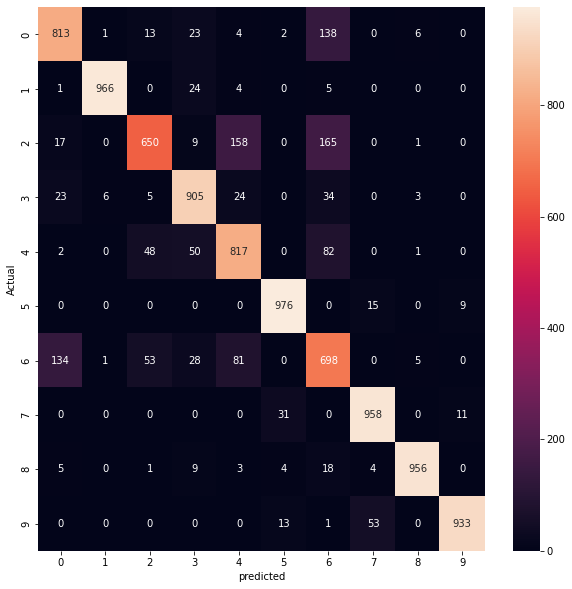

In [27]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cnf_matrix,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Actual')